<a href="https://colab.research.google.com/github/rbelay1/Final-Project/blob/main/Df_of_Brown_Noser_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install trafilatura

In [3]:
import requests
import os 
from bs4 import BeautifulSoup
from trafilatura import fetch_url
from trafilatura import extract
import pandas as pd
import urllib.parse
from textblob import TextBlob


data =[]
url_set = set()
for issue in range(26,124):
  url = f'http://thenoser.com/issue/{issue}'
  reqs = requests.get(url)
  soup = BeautifulSoup(reqs.text, 'html.parser')
  counter = 0
  for link in soup.find_all('a'):
      if '/article/' in link.get('href'):
        article_url = f"http://thenoser.com{link.get('href')}"
        parsed_url = urllib.parse.urlparse(article_url)
        normalized_url = parsed_url.scheme + "://" + parsed_url.netloc + parsed_url.path
        if normalized_url not in url_set:
          try: 
            article_html = fetch_url(article_url)
            article_text = extract(article_html)
            sentiment = TextBlob(article_text).sentiment.polarity
            data.append([article_url,issue,counter,article_text,sentiment])
            counter+=1
            url_set.add(normalized_url)
          except:
            print(f"Error occurred while processing {article_url}")
            pass
month_year_map={26: '11/2006', 27: '12/2006', 28: '12/2006', 29: '02/2007', 30: '03/2007', 31: '04/2007', 32: '10/2007', 33: '11/2007', 34: '02/2008', 35: '04/2008', 36: '10/2008',
           37:'12/2008', 38: '02/2009', 39: '04/2009', 40: '10/2009', 41: '12/2009', 42: '02/2010', 43: '04/2010', 59: '03/2012', 60:'03/2012', 62:'09/2012', 63:'11/2012', 64:'12/2012',
           65:'03/2013', 66: '03/2013', 67:'09/2013', 68:'10/2013', 70:'12/2013', 72:'03/2014', 73: '09/2014', 75:'12/2014', 77: '12/2014', 78: '03/2015', 79:'04/2015', 80: '10/2015',
           82:'10/2015', 84: '12/2015', 85:'03/2016', 86:'04/2016', 87:'09/2016', 88:'11/2016', 89: '12/2016', 90:'03/2017', 91: '04/2017', 92:'09/2017',93:'11/2017', 94: '12/2017',
           95:'03/2018', 96: '04/2018', 97:'09/2018', 98:'10/2018', 99:'12/2018', 100:'03/2019', 101:'04/2019', 102:'09/2019', 103: '10/2019', 104:'12/2019', 107:'03/2020', 108:'04/2020',
           109:'09/2020', 110:'10/2020', 111:'02/2021', 112:'03/2021', 113:'04/2021', 114:'09/2021', 115:'10/2021', 116:'12/2021', 117:'02/2022', 118:'03/2022', 119:'04/2022', 
           120:'09/2022', 121:'10/2022', 122:'12/2022', 123:'02/2023', 124:'04/2023'}
def get_publication_month(issue_number):
    return month_year_map.get(issue_number, '')
df = pd.DataFrame(data,columns=['url','issue number','article number','text','sentiment'])
df['publication date'] = df['issue number'].apply(get_publication_month)
df = df.drop_duplicates()

In [4]:
df

,url,issue number,article number,text,sentiment,publication date
0,http://thenoser.com/article/Simmons-Leaves-To-...,26,0,Following inquiries into to the cause of her r...,0.200916,11/2006
1,http://thenoser.com/article/Bagel-Gourmet-to-O...,26,1,Serving quality Mexican food and excessive amo...,0.006709,11/2006
2,http://thenoser.com/article/Cranky-Alcoholic-M...,26,2,The curmudgeonly behavior of local alcoholic R...,-0.091601,11/2006
3,http://thenoser.com/article/Secretary-of-Educa...,26,3,Explaining that American public school student...,0.090000,11/2006
4,http://thenoser.com/article/Hundreds-of-Bodies...,26,4,An unprecedented tragedy has befallen the peop...,0.048844,11/2006
...,...,...,...,...,...,...
1098,http://thenoser.com/article/Report-Every-Stude...,123,11,Students from a class on the literature of New...,0.190325,02/2023
1099,http://thenoser.com/article/Astrophysics-Conce...,123,12,"Walking to his dorm after dinner, astrophysics...",0.129727,02/2023
1100,http://thenoser.com/article/Musical-Set-In-195...,123,13,Reports indicate that modern musical Against t...,0.026136,02/2023
1101,http://thenoser.com/article/17-Year-Olds-Top-G...,123,14,"According to local sources, 17-year-old Devon ...",0.176389,02/2023


In [5]:
df[(df['article number'] == 0) & (df['issue number'] == 26)]

,url,issue number,article number,text,sentiment,publication date
0,http://thenoser.com/article/Simmons-Leaves-To-...,26,0,Following inquiries into to the cause of her r...,0.200916,11/2006


(26.0, 124.0)

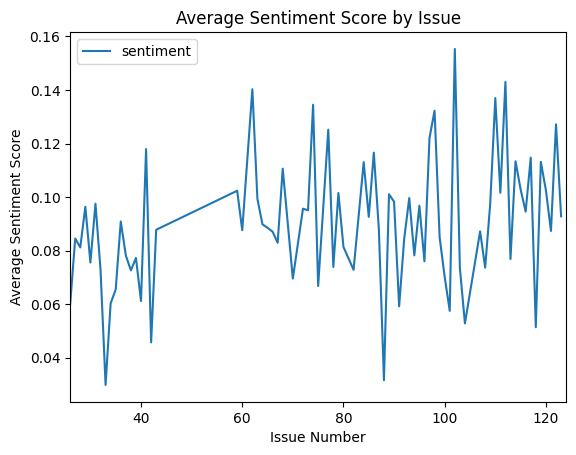

In [74]:
import matplotlib.pyplot as plt
import numpy as np

## created new df with sentiment score mean based on issue and plotted the mean for each issue on line graph
avg_in = df.groupby('issue number')['sentiment'].mean().reset_index()
avg_in.plot(x='issue number', y= 'sentiment', title = 'Average Sentiment Score by Issue', xlabel='Issue Number', ylabel='Average Sentiment Score')
plt.xlim(26,124)



In [79]:
## Trying to create another plot that categorizes the publication dates into Spring and Fall and looks at the mean sentiment for each
szn_df = df['season'] = '' #creates new dataframe with new column, "season"

for ii, row in df.iterrows(): #iterates through the rows
  month = row['publication date'].month #tried to extract the month but an error occurs here because dates 
                                        #in the df are in number form and do not explicitly say the month
  if month >= 9 and month <= 12: #if the month is btw Sep and Dec
    df.at[ii, 'season'] = 'Fall' #assign it to "fall" in 'season' column
  elif month >= 1 and month <= 5:  #if the month is btw Jan and May
    df.at[ii, 'season'] = 'Spring' #assign it to "spring" in 'season' column

avg_szn = df.groupby('season')['sentiment'].mean().reset_index() #creating df with sentiment mean based on season
avg_szn.plot(x='season', y= 'sentiment', title = 'Average Sentiment Score by Season', xlabel='Season', ylabel='Average Sentiment Score')
plt.xlim(26,124)



ValueError: ignored